In [1]:
### 텐서플로우 프레임워크(패키지라고도 칭함)
import tensorflow as tf

### 케라스 라이브러리 불러들이기
from tensorflow import keras

from keras.layers import Input, Dense
from keras.models import Sequential                  # 순차 모델 클래스
from keras.layers import Dense, Dropout, Input       # 완전 연결층(Dense), 드롭아웃(Dropout) 레이어
from keras.regularizers import l2                    # L2 정규화 함수
from keras.callbacks import EarlyStopping, ModelCheckpoint           # 조기 종료 콜백 함수

### 판다스 라이브러리 불러들이기
import pandas as pd

### 시각화 라이브러리 불러들이기
import matplotlib.pyplot as plt

### 넘파이
import numpy as np

### 훈련 및 테스트 데이터로 분류하는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### MAE, MSE, R2-Score 평가 라이브러리
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 딥러닝 랜덤 규칙 정의하기
# - 딥러닝에서의 랜덤 규칙은 항상 일정하게 유지되지는 않음
# - 딥러닝 모델 내부에서 훈련을 위한 데이터를 임의로 추출하여 사용(사람이 관여 안함)
tf.keras.utils.set_random_seed(42)

In [2]:
data = pd.read_csv("./data/01_회귀_주택가격예측_데이터셋_Row_1000.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   면적          1000 non-null   float64
 1   층수          1000 non-null   int64  
 2   역까지_도보시간    1000 non-null   float64
 3   주변_편의시설_점수  1000 non-null   float64
 4   주택_가격       1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
0,121.146284,13,35.025575,9.100563,16601.167450
1,69.040391,27,21.442580,2.792623,11420.654974
2,153.858939,8,10.174919,2.803478,23286.484864
3,71.656510,20,48.844439,1.983254,7535.429045
4,177.556747,4,2.466979,4.395939,29848.361648


In [3]:
### 독립변수와 종속변수로 분리하기
# - 독립변수명 : X (대문자)
X = data.iloc[:, :-1]
print(X)
# - 종속변수명 : y (소문자)
y = data.iloc[:, -1]
print(y)

             면적  층수   역까지_도보시간  주변_편의시설_점수
0    121.146284  13  35.025575    9.100563
1     69.040391  27  21.442580    2.792623
2    153.858939   8  10.174919    2.803478
3     71.656510  20  48.844439    1.983254
4    177.556747   4   2.466979    4.395939
..          ...  ..        ...         ...
995  109.964997   7  47.173178    7.412281
996   37.051580  19  38.339751    7.545630
997   69.009828  27   1.159038    3.559802
998  132.588140  23  15.994720    1.331994
999  118.062548  13  43.325112    4.889272

[1000 rows x 4 columns]
0      16601.167450
1      11420.654974
2      23286.484864
3       7535.429045
4      29848.361648
           ...     
995    12116.676007
996     6035.386052
997    12017.803413
998    20958.547577
999    14265.164818
Name: 주택_가격, Length: 1000, dtype: float64


In [4]:
# - 데이터 스케일링 : Standard Scaler 사용
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

# - 훈련 : 테스트 = 8 : 2로 분리
#  -> 변수명 : X_train, y_train, X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(
                                                    X_scaled, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 4) (800,)
(200, 4) (200,)


### 심층신경망(DNN) 모델로 훈련시키기

In [ ]:
"""
심층신경망(DNN)으로 훈련 가능한 데이터 형태
 - 이미지 데이터, 일반 수치형 데이터
 - 회귀, 분류분석 모두 가능함
"""

In [ ]:
"""
 <모델 생성하기>
  - 모델명 : model
  - 입력계층 생성 : 출력갯수 64, 활성화함수 relu
  - 은닉계층 생성 : 출력갯수 34, 활성화함수 relu
  - 출력계층 생성 : 출력갯수 ?, 활성화함수 ?
  
  - 모델 구조 확인까지만(모델 설정전 까지만)
"""

In [5]:
model = Sequential([
    ### 입력계층
    Input(shape=(4, )),
    Dense(64, activation="relu", name="Input_layer"),
    
    ### 은닉계층
    Dense(32, activation="relu", name="Hidden_layer"),
    
    ### 출력계층
    Dense(1, activation="linear", name="Output_layer")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 64)                320       
                                                                 
 Hidden_layer (Dense)        (None, 32)                2080      
                                                                 
 Output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [6]:
### 모델 환경 설정
# - 옵티마이저 : adam 사용
# ** 회귀분석에서는 metrics 정확도는 출력에 사용하지 않습니다.(손실만 사용함)
#  -> metrics 정확도는 "분류분석에서는 사용"합니다.
model.compile(
    optimizer="adam",
    ### 회귀분석 시에는 MSE를 이용하여 손실을 측정함
    loss = "mean_squared_error",
)

In [ ]:
"""
<콜백 함수 적용하기>
 - 저장할 모델명 : best_linear_model.h5
 - 자동 저장 및 자동 종료 콜백함수 정의하기
"""

In [7]:
modelcheckpoint = ModelCheckpoint(
    "./model/best_linear_model.h5",
    save_best_only = True
)

earlystopping = EarlyStopping(
    patience = 2,
    restore_best_weights=True
)

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, 
                     y_test), 
    epochs=1000, 
    callbacks=[modelcheckpoint, earlystopping]
)

Epoch 1/1000
25/25 [==============================] - 1s 6ms/step - loss: 455121952.0000 - val_loss: 431343872.0000
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 455076960.0000 - val_loss: 431289248.0000
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 455000160.0000 - val_loss: 431192064.0000
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 454864064.0000 - val_loss: 431016864.0000
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 454623648.0000 - val_loss: 430725248.0000
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 454232800.0000 - val_loss: 430259936.0000
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 453633440.0000 - val_loss: 429576064.0000
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 452780160.0000 - val_loss: 428610720.0000
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss

In [8]:
model_final = keras.models.load_model("./model/best_linear_model.h5")

train_score = model_final.evaluate(X_train, y_train)
val_score = model_final.evaluate(X_test, y_test)

print(f"훈련 : {train_score}")
print(f"검증 : {val_score}")

7/7 [==============================] - 0s 0s/step - loss: 428348.4688
훈련 : 355745.0
검증 : 428348.46875


In [9]:
### 테스트 데이터의 0번째 값으로 예측하기
test_pred = model_final.predict(X_test[:1])
test_pred, y_test[:1]

1/1 [==============================] - 0s 51ms/step


(array([[37210.81]], dtype=float32),
 521    37736.352245
 Name: 주택_가격, dtype: float64)

### 회귀모델 평가하기(머신러닝에서의 평가와 동일)

In [ ]:
"""
 - 모델 평가하기 : MAE, MSE, R2-score
 - R2값을 이용해서 모델이 좋고 나쁨 판단 가능(결정력, 해석력)
"""

In [10]:
X_pred = model_final.predict(X_train)

mae = mean_absolute_error(y_train, X_pred)
print("MAE:", mae)

mse = mean_squared_error(y_train, X_pred)
print("MSE:", mse)

r2 = r2_score(y_train, X_pred)
print("R²:", r2)

25/25 [==============================] - 0s 837us/step
MAE: 490.2112418077189
MSE: 355744.99882219965
R²: 0.9966699962060751


In [ ]:
"""
훈련 vs 테스트 손실곡선 시각화하기
"""

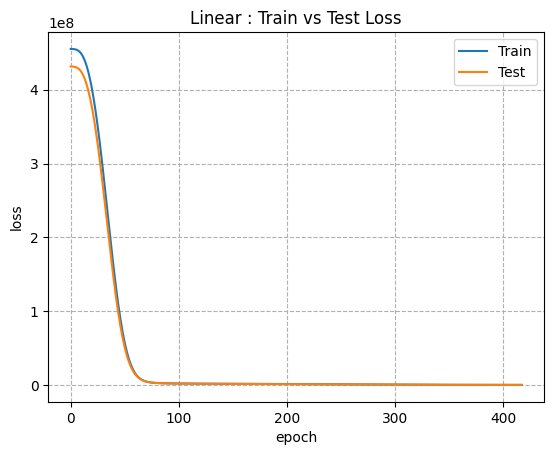

In [11]:
plt.title("Linear : Train vs Test Loss")
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(linestyle="--")
plt.legend(["Train", "Test"])
plt.show()